In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# **1. Iris Dataset**

IRIS Dataset Classification:
Accuracy Score: 1.0000
Precision Score: 1.0000
Recall Score: 1.0000
F1 Score: 1.0000


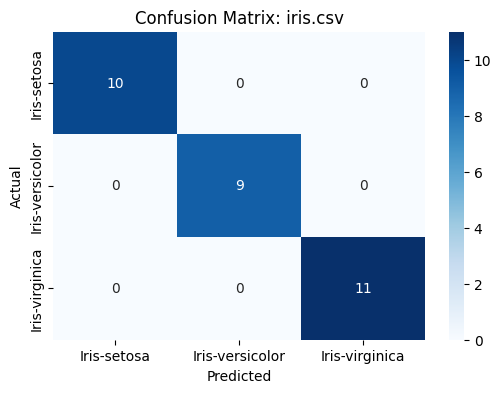

In [ ]:
def train_and_evaluate_iris():
    iris_df = pd.read_csv("iris.csv")

    X = iris_df.drop(columns=["species"])
    y = iris_df["species"]

    y_le = LabelEncoder()
    y = y_le.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Evaluating the model
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print("IRIS Dataset Classification:")
    print(f"Accuracy Score: {acc:.4f}")
    print(f"Precision Score: {prec:.4f}")
    print(f"Recall Score: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_le.classes_, yticklabels=y_le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix: iris.csv")
    plt.show()

train_and_evaluate_iris()

# **2. Drug Dataset**

Drug Dataset Classification:
Accuracy Score: 1.0000
Precision Score: 1.0000
Recall Score: 1.0000
F1 Score: 1.0000


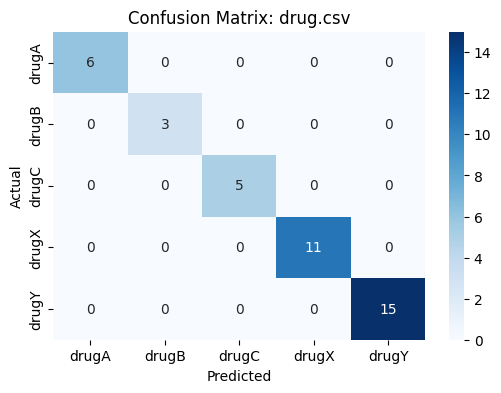

In [ ]:
def train_and_evaluate_drug():
    drug_df = pd.read_csv("drug.csv")

    categorical_features = ["Sex", "BP", "Cholesterol"]
    label_encoders = {}
    for col in categorical_features:
        le = LabelEncoder()
        drug_df[col] = le.fit_transform(drug_df[col])
        label_encoders[col] = le

    X = drug_df.drop(columns=["Drug"])
    y = drug_df["Drug"]

    y_le = LabelEncoder()
    y = y_le.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print("Drug Dataset Classification:")
    print(f"Accuracy Score: {acc:.4f}")
    print(f"Precision Score: {prec:.4f}")
    print(f"Recall Score: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_le.classes_, yticklabels=y_le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix: drug.csv")
    plt.show()

train_and_evaluate_drug()

# **3.Petrol Consumption Dataset**

Petrol Consumption Regression:
Mean Absolute Error (MAE): 94.3000
Mean Squared Error (MSE): 17347.7000
Root Mean Squared Error (RMSE): 131.7107


<ipython-input-12-0bac932f1e64>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette='viridis')


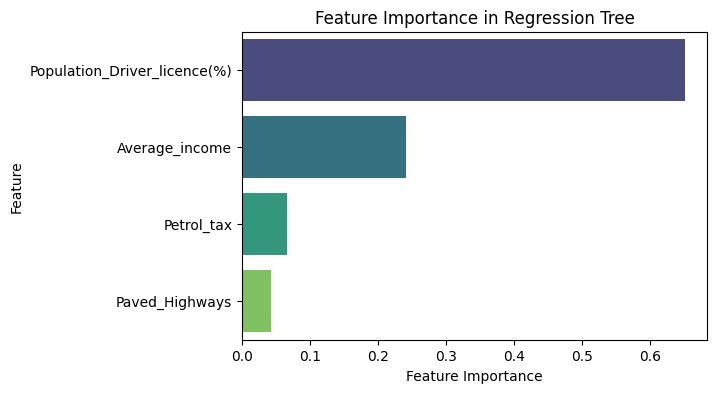

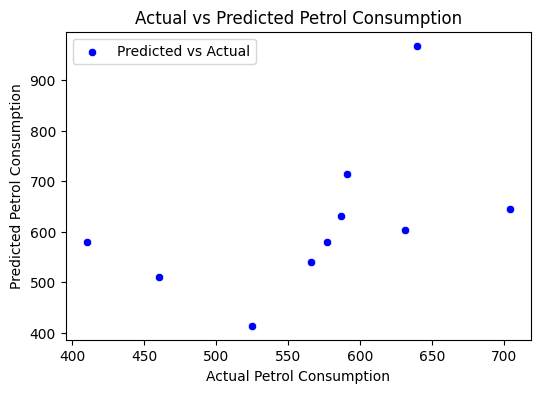

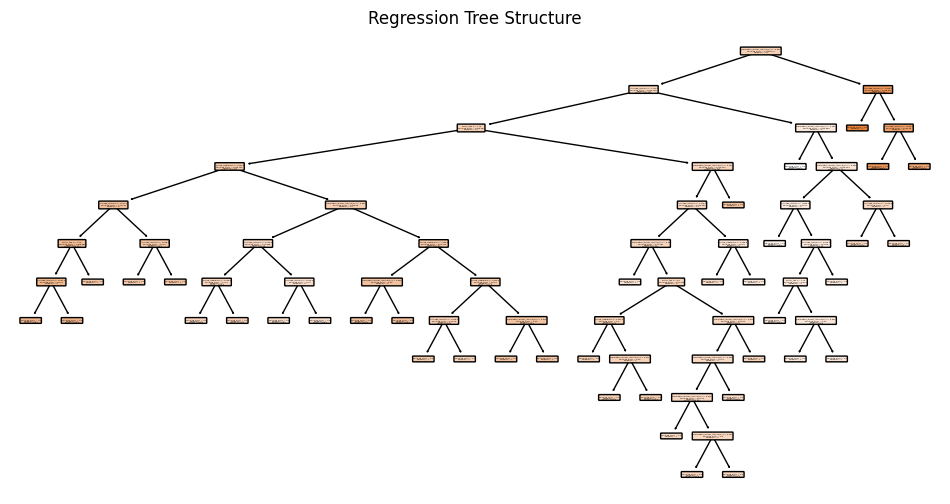

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

def train_and_evaluate_petrol():
    petrol_df = pd.read_csv("petrol_consumption.csv")

    X = petrol_df.drop(columns=["Petrol_Consumption"])
    y = petrol_df["Petrol_Consumption"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("Petrol Consumption Regression:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    feature_importances = model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette='viridis')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance in Regression Tree")
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')
    plt.xlabel("Actual Petrol Consumption")
    plt.ylabel("Predicted Petrol Consumption")
    plt.title("Actual vs Predicted Petrol Consumption")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plot_tree(model, feature_names=feature_names, filled=True, rounded=True)
    plt.title("Regression Tree Structure")
    plt.show()

train_and_evaluate_petrol()

Petrol Consumption Regression:
Mean Absolute Error (MAE): 86.4444
Mean Squared Error (MSE): 15649.4426
Root Mean Squared Error (RMSE): 125.0977


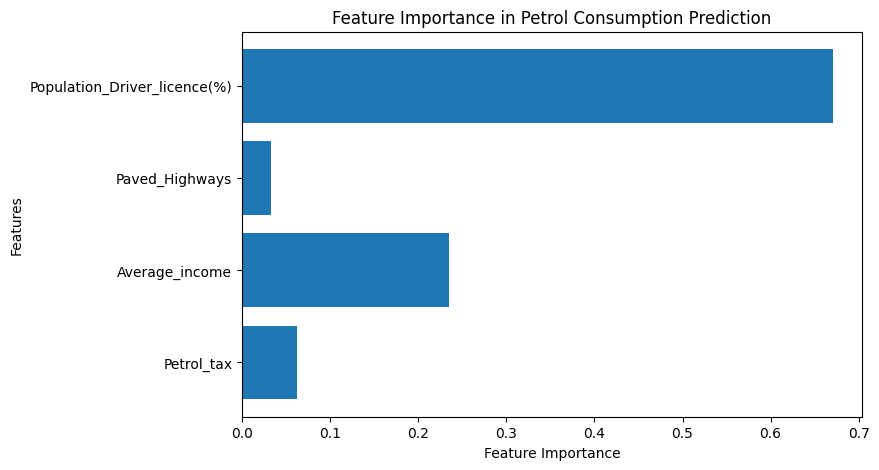

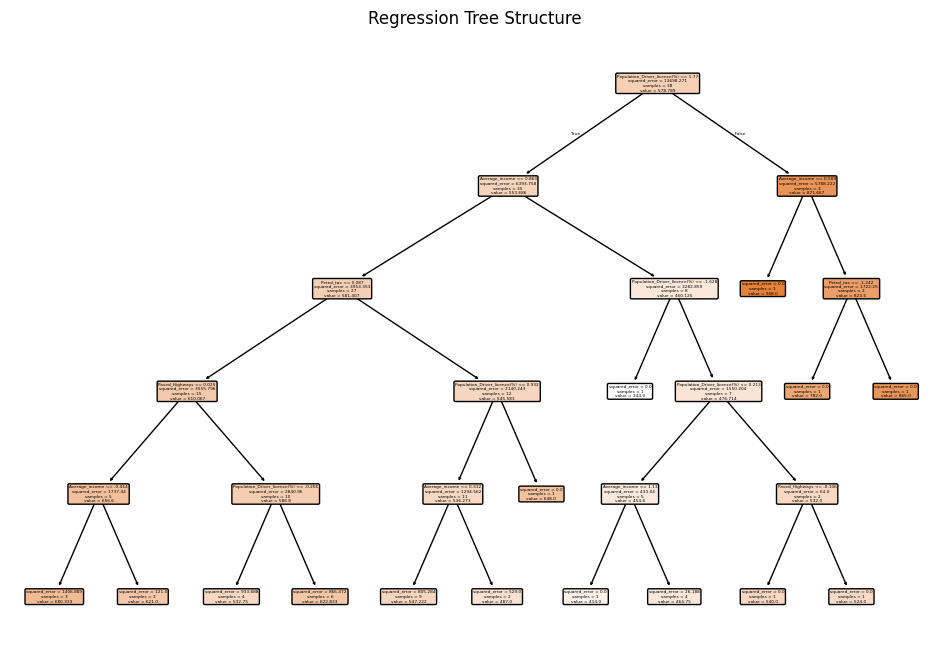

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

petrol_df = pd.read_csv("petrol_consumption.csv")

X = petrol_df.drop(columns=["Petrol_Consumption"])
y = petrol_df["Petrol_Consumption"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Petrol Consumption Regression:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

plt.figure(figsize=(8, 5))
plt.barh(petrol_df.columns[:-1], model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Petrol Consumption Prediction")
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=petrol_df.columns[:-1], filled=True, rounded=True)
plt.title("Regression Tree Structure")
plt.show()